## Steps
- Import Packages
- Webscrapping
- Clean the DataSet.
- Visualize the DataSet

## Import Packages

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Web Scrapping

In [2]:
#Scarpping Website to get Data
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1


   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


## Clean Data

In [3]:
#Create a DataFrame from df
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Overall not bad. Staff look ti...
1,✅ Trip Verified | This was our first flight wi...
2,✅ Trip Verified | I recently encountered a hig...
3,Not Verified | Beware! BA don't provide any r...
4,✅ Trip Verified | Check in was chaotic and ba...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
#Drop NaN columns
df.dropna()

,reviews
0,Not Verified | Overall not bad. Staff look ti...
1,✅ Trip Verified | This was our first flight wi...
2,✅ Trip Verified | I recently encountered a hig...
3,Not Verified | Beware! BA don't provide any r...
4,✅ Trip Verified | Check in was chaotic and ba...
...,...
995,✅ Trip Verified | Flying last Sunday from Gene...
996,✅ Trip Verified | London Heathrow to Paris CD...
997,✅ Trip Verified | Johannesburg to London. At ...
998,✅ Trip Verified | Edinburgh to Bangalore via H...


In [6]:
df.drop_duplicates()

,reviews
0,Not Verified | Overall not bad. Staff look ti...
1,✅ Trip Verified | This was our first flight wi...
2,✅ Trip Verified | I recently encountered a hig...
3,Not Verified | Beware! BA don't provide any r...
4,✅ Trip Verified | Check in was chaotic and ba...
...,...
995,✅ Trip Verified | Flying last Sunday from Gene...
996,✅ Trip Verified | London Heathrow to Paris CD...
997,✅ Trip Verified | Johannesburg to London. At ...
998,✅ Trip Verified | Edinburgh to Bangalore via H...


In [7]:
df[["Status", "Comments"]] = df["reviews"].str.split("|", expand=True)
df.drop(columns="reviews", inplace=True)

## Data Mining

In [8]:
df.head(5)

,Status,Comments
0,Not Verified,Overall not bad. Staff look tired and overwo...
1,✅ Trip Verified,This was our first flight with British Airway...
2,✅ Trip Verified,I recently encountered a highly disappointing...
3,Not Verified,Beware! BA don't provide any refund due to a...
4,✅ Trip Verified,Check in was chaotic and badly organised. Ev...


Create an DataFrame of Status

In [9]:
#Make an examine to see how many types of status are there.
df['Status'].value_counts()

Status
✅ Trip Verified     777
Not Verified        220
❎ Not Verified        2
cNot Verified         1
Name: count, dtype: int64

In [10]:
status_type = df['Status'].str.contains('Trip Verified').value_counts() #Series
status_type_df = pd.DataFrame(status_type)
status_type_df ##True is Trip Verified, False is Not Verified.

,count
Status,
True,777
False,223


Analize the Comment types (Good or Bad)

In [11]:
#Bad comments counting
bad_keywords = ['worst', 'bad', 'terrible', 'awful', 'dismal', 'grim', 'dire', 'poor', 'horrible', 'atrocious', 'abysmal', 'frightful', 'frighten', 'frighten', 'rubbish', 'weak', 'hopeless', 'wicked', 'disappointing', 'Inadequate', 'Appalling', 'Below par', 'Unsatisfactory', 'Lousy', 'Subpar', 'Miserable']

def bad_counts (array, data):
    bad_count = 0
    for comment in data['Comments']:
        if any(keyword in comment for keyword in array):
            bad_count += 1
    return bad_count

bad_comments = bad_counts(bad_keywords, df)
percentage_bad_comments = round((bad_comments/1000)*100, 2)
percentage_bad_comments
        

34.0

In [12]:
#Good comments counting
good_keywords = ['good', 'best', 'marvelous', 'perfect', 'finiest', 'reliable', 'Comfortable', 'Clean', 'friendly', 'nice', 'fine', 'comfort', 'relax', 'free', 'beautiful', 'delicious', 'skillful', 'professional', 'fantastic']
def good_counts (array, data):
    good_count = 0
    for comment in data['Comments']:
        if any(keyword in comment for keyword in array):
            good_count += 1
    return good_count

good_comments = good_counts(good_keywords, df)
percentage_good_comments = round((good_comments/1000)*100, 2)
percentage_good_comments

54.4

What comments talk about

In [33]:
#Talk about flight
flight_comment = df['Comments'].str.contains('flight').sum()
print(flight_comment)
#Talk about crew
crew_comment = df['Comments'].str.contains('crew').sum()
print(crew_comment)
#Talk about service
service_comment = df['Comments'].str.contains('service').sum()
print(service_comment)
#Talk about seat
seat_comment = df['Comments'].str.contains('seat').sum()
print(seat_comment)
#Talk about experience
experience_comment = df['Comments'].str.contains('experience').sum()
print(experience_comment)
#Talk about food
food_comment = df['Comments'].str.contains('food').sum()
print(food_comment)
#Talk about british
cabin_comment = df['Comments'].str.contains('cabin').sum()
print(cabin_comment)
#Talk about staff
staff_comment = df['Comments'].str.contains('staff').sum()
print(staff_comment)
#Talk about price
price_comment = df['Comments'].str.contains('price').sum()
print(price_comment)
#Talk about ticket
ticket_comment = df['Comments'].str.contains('ticket').sum()
print(ticket_comment)
#Talk about time
time_comment = df['Comments'].str.contains('time').sum()
print(time_comment)


800
296
458
413
212
279
227
252
75
103
433


In [40]:
talk_about_comments = {
    'flight_comment': [flight_comment],
    'crew_comment': [crew_comment], 
    'service_comment': [service_comment],
    'seat_comment': [seat_comment],
    'experience_comment': [experience_comment],
    'food_comment': [food_comment],
    'cabin_comment': [cabin_comment],
    'staff_comment': [staff_comment],
    'price_comment': [price_comment],
    'ticket_comment': [ticket_comment],
    'time_comment': [time_comment]
}

talk_about_comments_df = pd.DataFrame(talk_about_comments)
talk_about_comments_df

,flight_comment,crew_comment,service_comment,seat_comment,experience_comment,food_comment,cabin_comment,staff_comment,price_comment,ticket_comment,time_comment
0,800,296,458,413,212,279,227,252,75,103,433


## Statistic

In [13]:
df.describe()

,Status,Comments
count,1000,1000
unique,4,1000
top,✅ Trip Verified,Overall not bad. Staff look tired and overwo...
freq,777,1


## Data Visualize

Boxplot of Status type counting

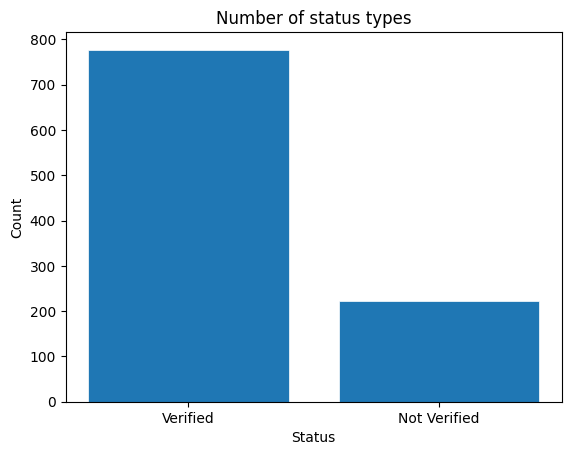

In [14]:
def boxplot_bar (dataFrame):
    x = ['Verified', 'Not Verified']
    fig, ax = plt.subplots()
    ax.bar(x, dataFrame['count'], edgecolor='white', linewidth= 0.5)
    plt.title('Number of status types')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.show()

boxplot_bar(status_type_df)

Create an plot stacked bar from status

In [15]:
#Create a dataframe contains all comment's status and ammount of them
percentage_neutral_commnets = 100 - (percentage_good_comments + percentage_bad_comments)
status_comments = {
    'Good_comments': [percentage_good_comments],
    'Bad_comments': [percentage_bad_comments],
    'Neutral_commnets': [percentage_neutral_commnets]
}
status_comments_df = pd.DataFrame(status_comments)
status_comments_df

,Good_comments,Bad_comments,Neutral_commnets
0,54.4,34.0,11.6


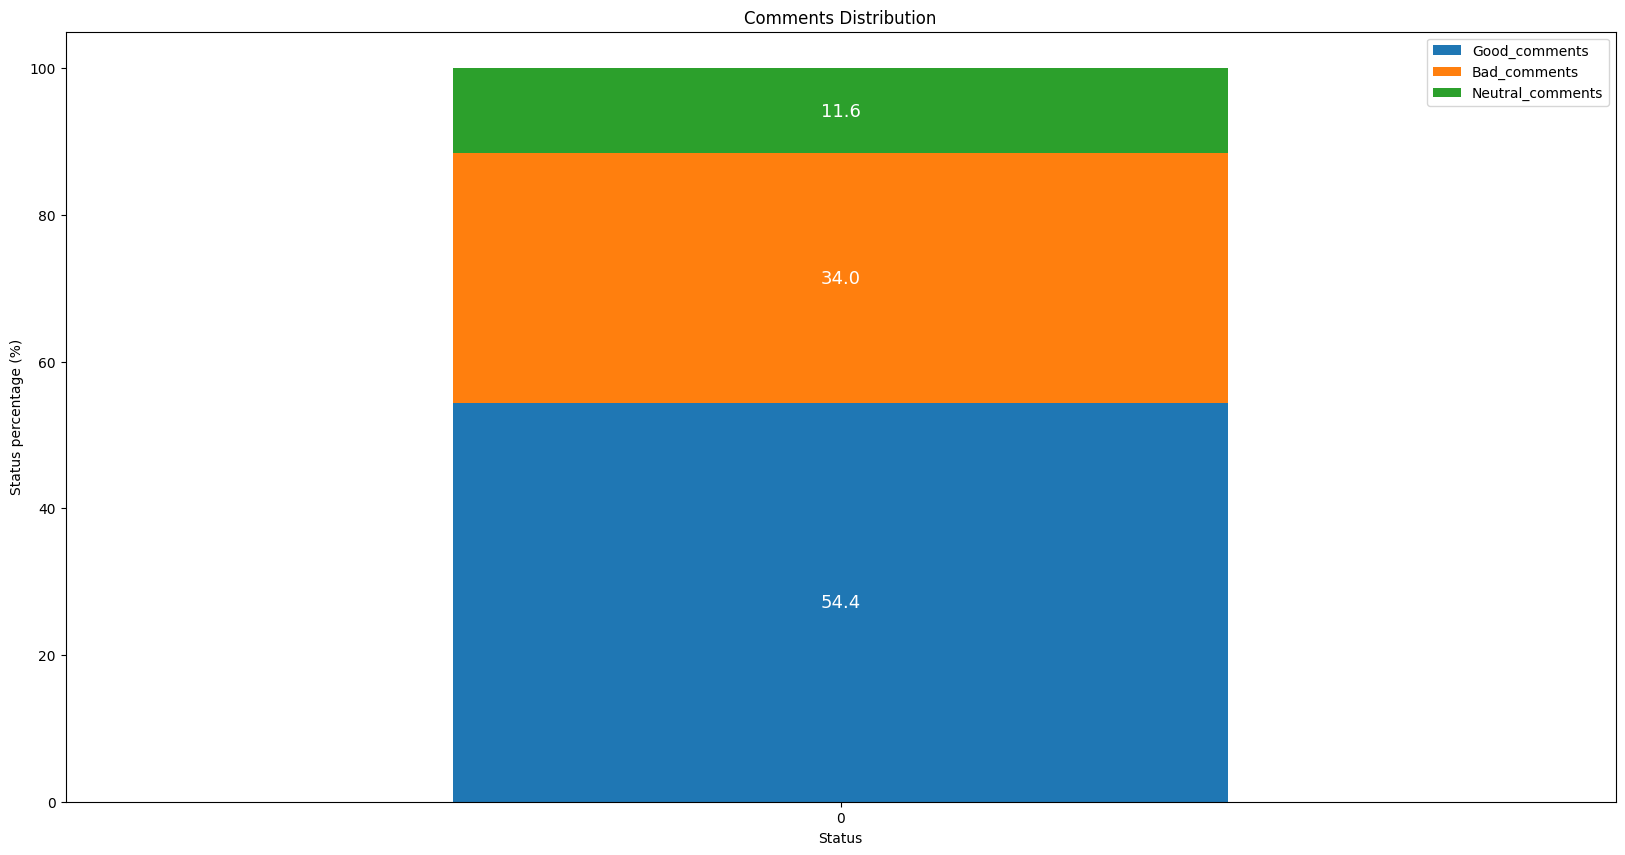

In [18]:
def plot_stacked_bar(dataframe, title_, size_=(20, 10), rot_=0, legend_='upper right'):

    ax = dataframe.plot(
        kind='bar',
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=13)
    # Rename legend
    plt.legend(['Good_comments', 'Bad_comments', 'Neutral_comments'], loc=legend_)
    # Name of label
    plt.ylabel("Status percentage (%)")
    plt.xlabel('Status')
    plt.show()

# Annotate_stacked_bar function
def annotate_stacked_bars(ax, pad=1, colour='white', textsize=14):
    '''
    Add value annotations to bar
    '''

    # Iterate through plotted rectanges/bars
    for i in ax.patches:
        # Calculate Annotation
        value = str(round(i.get_height(), 1))
        if value == '0.0':
            continue
        
        annotation_x = i.get_x() + i.get_width() / 2
        annotation_y = i.get_y() + i.get_height() / 2
        
        ax.annotate(
            value,
            (annotation_x, annotation_y),
            color=colour,
            size=textsize,
            ha='center',  # horizontal alignment
            va='center'   # vertical alignment
        )

# Example usage
plot_stacked_bar(status_comments_df, 'Comments Distribution')

Create a bar chart about main talking

In [46]:
def bar_chart (dataframe, title_, size_=(18,10), ):
    ax = dataframe.plot(
        kind= 'bar',
        figsize = size_,
        title= title_
    )
    annotate_bars(ax)
    plt.show()

def annotate_bars(ax, pad=1, colour='white', textsize=14):
    '''
    Add value annotations to bar
    '''

    # Iterate through plotted rectanges/bars
    for i in ax.patches:
        # Calculate Annotation
        value = str(round(i.get_height(), 1))
        if value == '0.0':
            continue
        
        annotation_x = i.get_x() + i.get_width() / 2
        annotation_y = i.get_y() + i.get_height() / 2
        
        ax.annotate(
            value,
            (annotation_x, annotation_y),
            color=colour,
            size=textsize,
            ha='center',  # horizontal alignment
            va='center'   # vertical alignment
        )

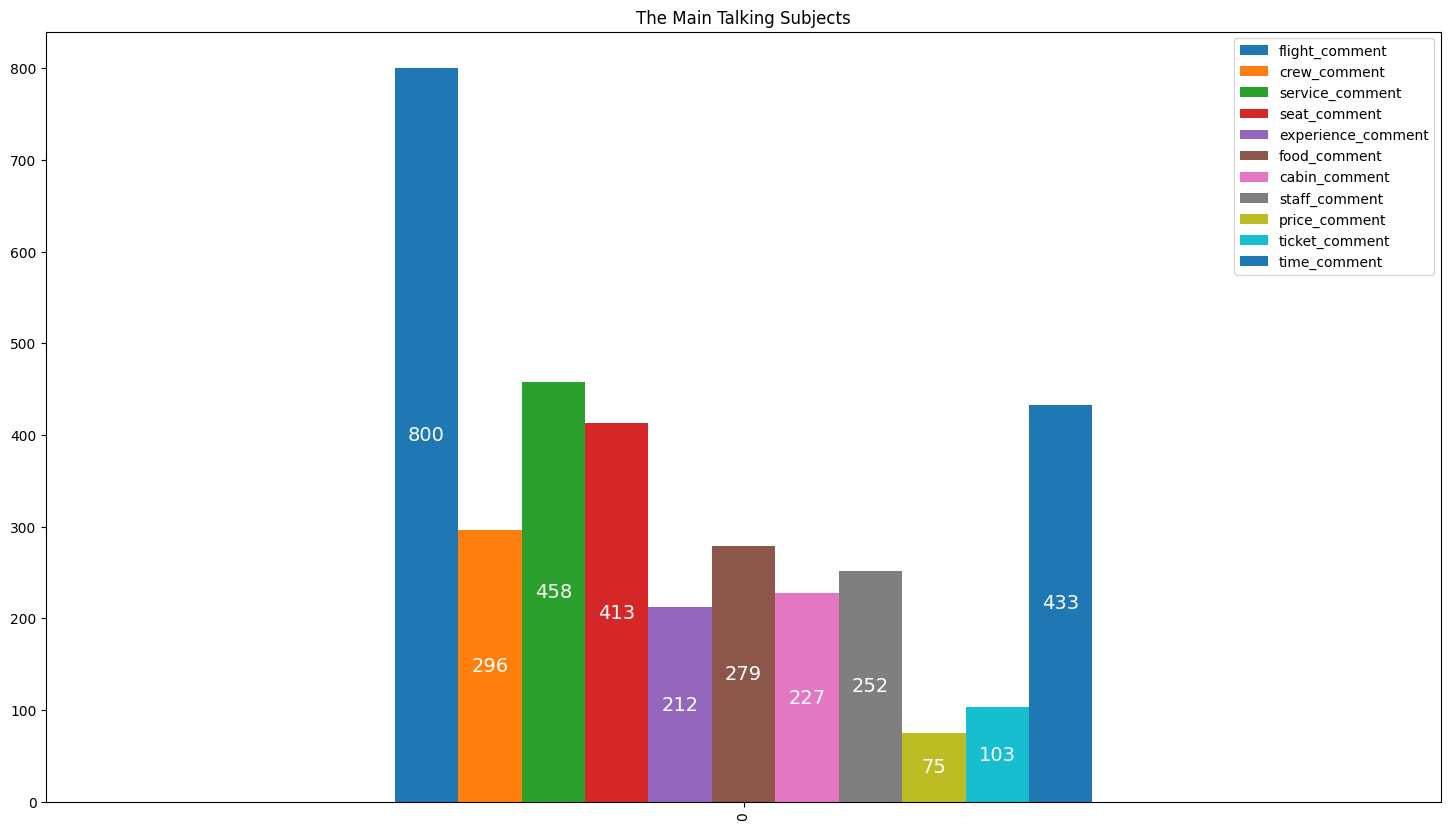

In [47]:
bar_chart(talk_about_comments_df, 'The Main Talking Subjects')